
# AAI612: Deep Learning & its Applications

*Notebook 1.1: Using the perceptron for linear fitting*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week1/Notebook1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 1.1

In this notebook, we will perform linear regression using a single neuron.  We will be using `TensorFlow` and `Keras`; however, do not worry about the details of the language for the moment as we will get back to these later on.

The simple mode we will be looking at will learn the relationship between two numbers and will be used to predict other numbers. For example, if you were writing code for a function like this: 


```
y = mx + b
```

How would you train a neural network to do the equivalent task? Well, we said using data, a lot of data! The approach is to feed the model with a set of Xs, and a set of Ys, it should be able to figure out the relationship between them. 

# Linear Regression 

Let us start by linear regression.   Assume we have the following simple dataset.  We can easily fit using `polyfit():`

In [1]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import numpy as np


x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])

Let us explore the data!

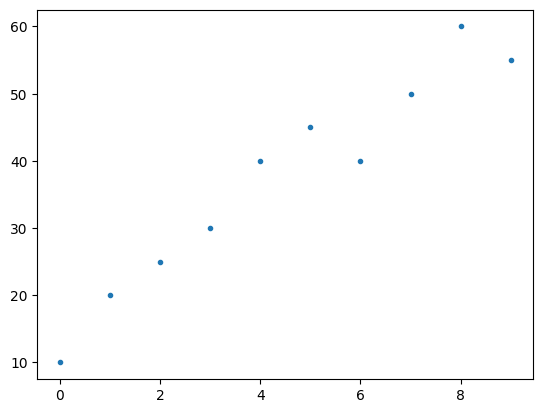

In [2]:
plt.plot(x, y, '.')
plt.show()

Now, let us see how we can best fit this data using the `polyfit`:

In [3]:
b, m = polyfit(x,y,1)

y_hat = m*x+b

The above data fit results with the following equation:

In [ ]:
print("Equation that best fits the data is: Y = %2.2f * x + %5.2f" % (m,b))

and now, let us see how it fits visually:

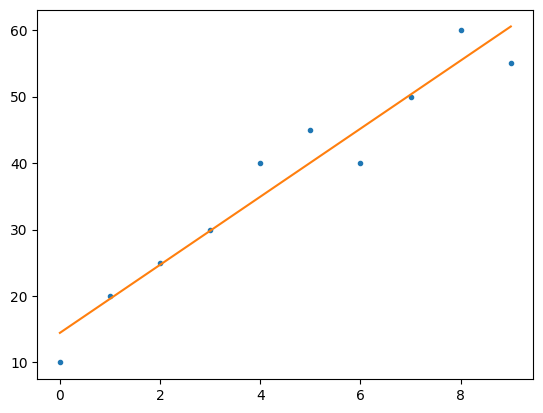

In [4]:
plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

Let us predict y for x = 10

In [5]:
x = 10
print(m*x+b)

65.66666666666664


Now, let us try this all over again using one neuron.  We will be using `Keras` and `TesnorFlow`.

## Imports

Let's start with our imports. Here we are importing 'TensorFlow' and calling it tf for ease of use.  We do of course need to import `numpy`, which helps us to represent our data as lists easily and quickly.  Finally, the framework for defining a neural network as a set of Sequential layers is called keras, so we import that too.

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.13.0-rc1


## Define and Compile the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.

In [7]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now we compile our Neural Network. When we do so, we have to specify 2 functions, a loss and an optimizer.

If you've seen lots of math for machine learning, here's where it's usually used, but in this case it's nicely encapsulated in functions for you. But what happens here — let's explain...

We know that in our function, the relationship between the numbers is Y = 5.12 * x + 14.45. 

When the computer is trying to 'learn' that, it makes a guess...maybe y=10x+10. The LOSS function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the OPTIMIZER function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with somehting like y=5x+5, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower)

It will repeat this for the number of EPOCHS which you will see shortly. But first, here's how we tell it to use 'MEAN SQUARED ERROR' for the loss and 'STOCHASTIC GRADIENT DESCENT' for the optimizer. You don't need to understand the math for these yet, but you can see that they work! :)

Over time you will learn the different and appropriate loss and optimizer functions for different scenarios. 


In [8]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up we'll feed in some data. In this case we are taking 6 xs and 6ys. You can see that the relationship between these is that y=2x-1, so where x = -1, y=-3 etc. etc. 

A python library called 'Numpy' provides lots of array type data structures that are a defacto standard way of doing it. We declare that we want to use these by specifying the values as an np.array[]

### Let us try this dataset!

Comment the above data set and try this one now:

In [9]:
xs = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
ys = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])

# Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the Xs and Ys is in the **model.fit**  call. This is where it will go through the loop we spoke about above, making a guess, measuring how good or bad it is (aka the loss), using the opimizer to make another guess etc. It will do it for the number of epochs you specify. When you run this code, you'll see the loss on the right hand side.

In [10]:
from keras.callbacks import History 
history = History()

x = model.fit(xs, ys, epochs=500, callbacks=[history], verbose=0)

Ok, that we have a model that we have trained to learn the relationship between X and Y, we can use the **model.predict** method to have it figure out the Y for a previously unknown X. So, for example, if X = 2, what do you think Y will be? Take a guess before you run this code:

In [11]:
print(x.history)

{'loss': [1442.078857421875, 303.7044982910156, 106.5599365234375, 72.03011322021484, 65.599365234375, 64.0283203125, 63.302040100097656, 62.726829528808594, 62.182769775390625, 61.64910888671875, 61.12220001220703, 60.601341247558594, 60.086387634277344, 59.57722091674805, 59.073814392089844, 58.5760612487793, 58.08390426635742, 57.597312927246094, 57.116180419921875, 56.640480041503906, 56.170127868652344, 55.705078125, 55.245262145996094, 54.79063034057617, 54.34111785888672, 53.89666748046875, 53.45722198486328, 53.022727966308594, 52.5931282043457, 52.168373107910156, 51.748390197753906, 51.33313751220703, 50.92256164550781, 50.5166130065918, 50.11522674560547, 49.7183837890625, 49.32598876953125, 48.938018798828125, 48.55442428588867, 48.175140380859375, 47.80014419555664, 47.42936325073242, 47.06275177001953, 46.70027160644531, 46.34189224243164, 45.987525939941406, 45.637168884277344, 45.290740966796875, 44.9482307434082, 44.609554290771484, 44.27471160888672, 43.94363403320312

<Axes: >

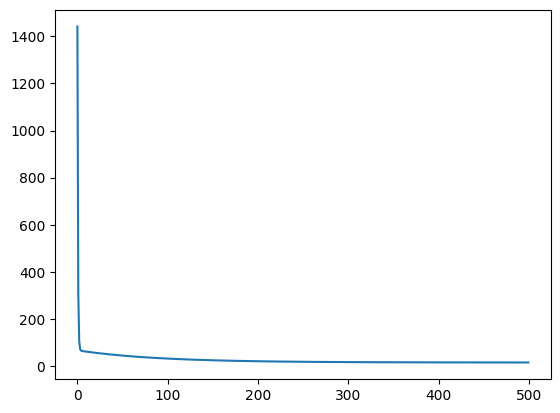

In [12]:
import seaborn as sns
sns.lineplot(data=x.history['loss'])

In [13]:
model.predict([10])

1/1 [==============================] - 0s 41ms/step


array([[66.1353]], dtype=float32)

You might have thought 65, right? But it ended up being a little over. Why do you think that is? 

Remember that neural networks deal with probabilities, so given the data that we fed the NN with, it calculated that there is a very high probability that the relationship between X and Y is Y = 5.12 * x + 14.45, but with only 10 data points we can't know for sure. As a result, the result for 10 is very close to 65, but not necessarily 65. 

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.
